In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

# Data Loading, Cleaning and Initial Data Exploration


In [2]:
df=pd.read_csv('c:/Users/subhi/Downloads/customer_shopping_data.csv/customer_shopping_data.csv')

In [3]:
df['invoice_date']

0          5/8/2022
1        12/12/2021
2         9/11/2021
3        16/05/2021
4        24/10/2021
            ...    
99469    24/10/2021
99470    24/05/2022
99471    13/03/2022
99472    13/01/2021
99473     4/11/2021
Name: invoice_date, Length: 99474, dtype: object

In [4]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y') #convert invoice date to date time format

In [5]:
#Size and info of data

print(f"The size of the data is {df.shape}")
print(f"The data have  {df.shape[0]} rows and {df.shape[1]} columns.")
print()
print(f"The overall information of the data:")
print()
print(df.info())

The size of the data is (99474, 10)
The data have  99474 rows and 10 columns.

The overall information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99474 entries, 0 to 99473
Data columns (total 10 columns):
invoice_no        99474 non-null object
customer_id       99474 non-null object
gender            99474 non-null object
age               99474 non-null int64
category          99474 non-null object
quantity          99474 non-null int64
price             99474 non-null float64
payment_method    99474 non-null object
invoice_date      99474 non-null datetime64[ns]
shopping_mall     99474 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB
None


In [6]:
df.isna().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
df.describe()


,age,quantity,price
count,99474.000000,99474.000000,99474.000000
mean,43.426745,3.003448,689.318549
std,14.990668,1.413047,941.195839
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# 1. Demographic Analysis:

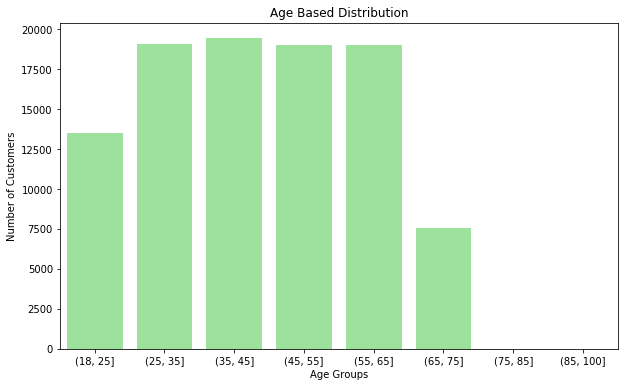


Average age of customers: 43
Aveage age group: (35, 45]


In [8]:
# Distribution of customer based on Age

age_bins = [18,25,35,45,55,65,75,85,100]    #Creating age bins
df['age_group'] = pd.cut(df['age'], bins = age_bins)

age_distribution = df['age_group'].value_counts()

plt.figure(figsize = (10,6))

sns.barplot(x=age_distribution.index, y = age_distribution.values, color = 'lightgreen')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Age Based Distribution')
plt.xticks(rotation= 0)
plt.show()
print()
print(f"Average age of customers: {df['age'].mean():.0f}")
print(f"Aveage age group: {df['age_group'].mode()[0]}")

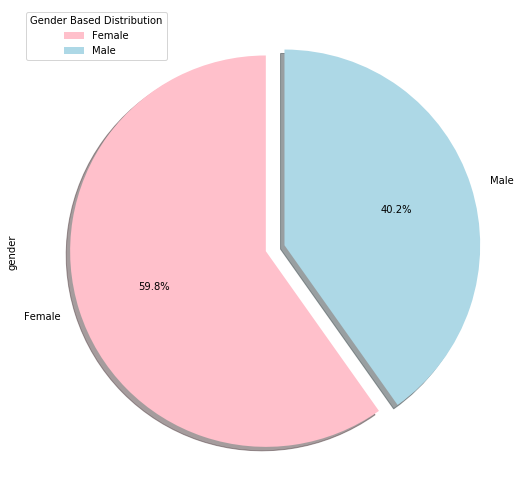

In [9]:
# Distribution of customer based on Gender

df_gbd = df['gender'].value_counts()
plt.figure(figsize=(9, 9))
df_gbd.plot(kind='pie', autopct='%1.1f%%', startangle= 90, explode = [0, 0.1], shadow = True, colors = ['pink', 'lightblue'])
plt.legend(title='Gender Based Distribution')

plt.show()

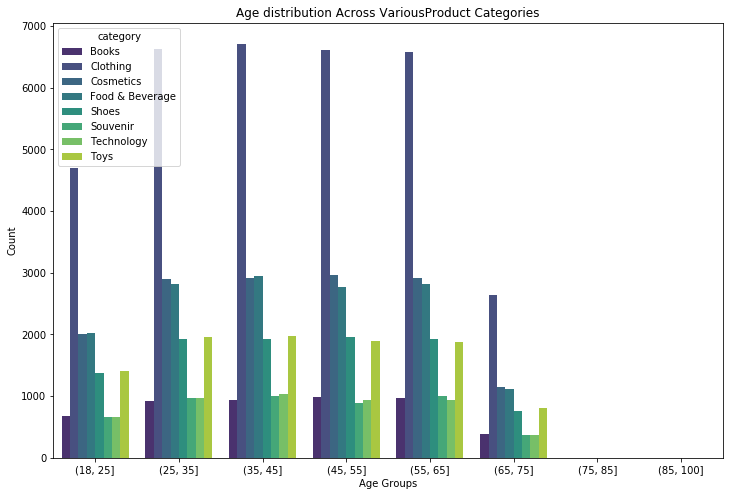

In [10]:
# Age distribution across different product categories

df_ageXcategory = df.groupby(['category', 'age_group']).size().reset_index(name='count')
df_ageXcategory

plt.figure(figsize = (12,8))
sns.barplot(x='age_group',y='count',hue='category',data=df_ageXcategory, palette = 'viridis')
plt.title('Age distribution Across VariousProduct Categories')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

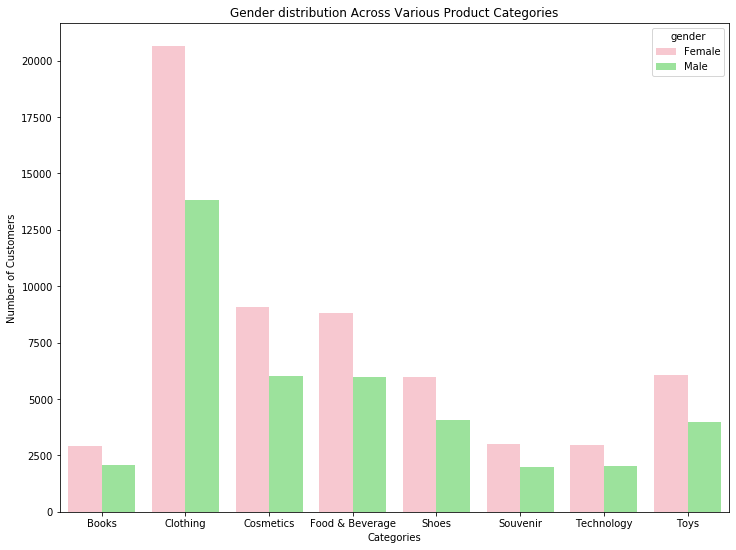

In [11]:
# Gender distribution across different product categories

df_genderXcategory = df.groupby(['gender', 'category']).size().reset_index(name = 'count')
df_genderXcategory
plt.figure(figsize=(12,9))

sns.barplot(x='category', y='count', hue= 'gender', data=df_genderXcategory, palette = ['pink', 'lightgreen'])
plt.title('Gender distribution Across Various Product Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Customers')
plt.show()

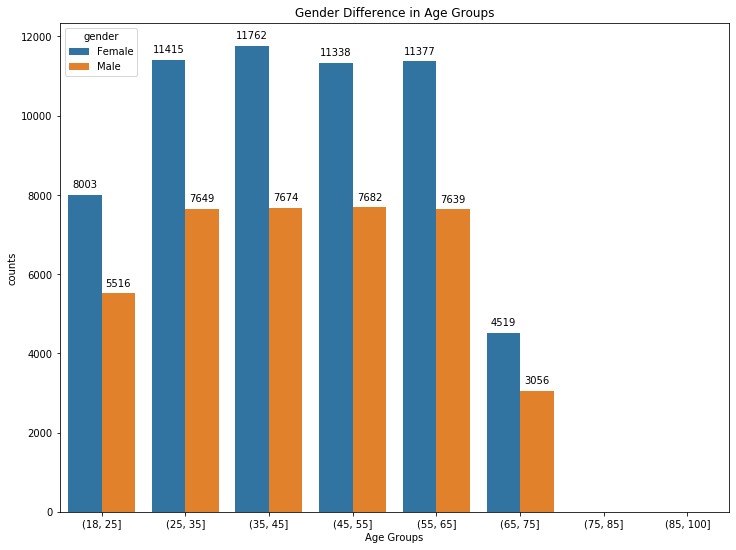

In [12]:
# Gender distribution across different age groups

df_genderXage = df.groupby(['gender', 'age_group']).size().reset_index(name='count')
df_genderXage
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'age_group', y = 'count', hue='gender', data = df_genderXage)

for p in ax.patches:
  total_count = p.get_height()
  ax.annotate(f'{total_count:.0f}', (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')

plt.title('Gender Difference in Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('counts')
plt.show()

# 2. Purchase History:

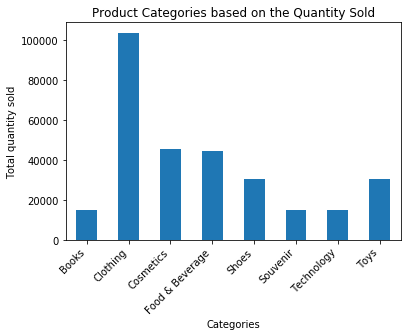

In [13]:
# Product categories based on the quantity sold

df_categoryXquantity = df.groupby('category')['quantity'].sum()
df_categoryXquantity
df_categoryXquantity.sort_index().plot(kind = 'bar')
plt.title('Product Categories based on the Quantity Sold')
plt.xlabel('Categories')
plt.ylabel('Total quantity sold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

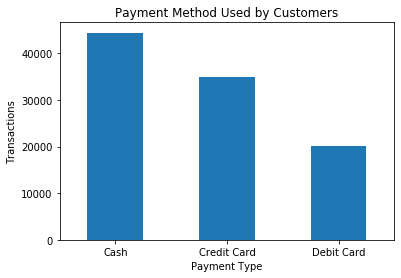

Total payment made by Cash: 44453
Total payment made by Credit Card: 34940
Total payment made by Debit Card: 20081


In [14]:
# Total transaction made by payment method

df_priceXpayment_method = df.groupby('payment_method')['price'].count()
df_priceXpayment_method.sort_index().plot(kind = 'bar')
plt.title('Payment Method Used by Customers')
plt.xlabel('Payment Type')
plt.ylabel('Transactions')
plt.xticks(rotation = 0)
plt.show()
for i, j in df_priceXpayment_method.items():
  print(f"Total payment made by {i}: {j}")

# 3. Customer Behavior:

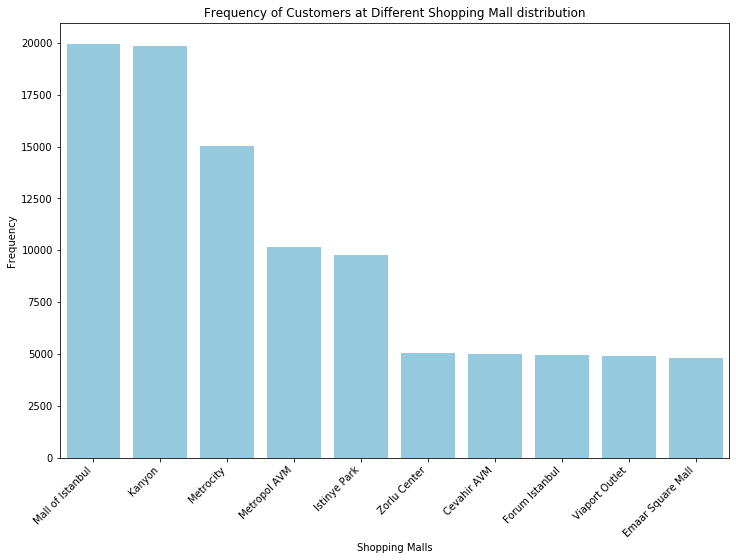

In [15]:
# Shopping Mall distribution. How frequently do customers shop at different shopping malls?

df_shopping_mall = df['shopping_mall'].value_counts()
df_shopping_mall
plt.figure(figsize = (12,8))

sns.barplot(x=df_shopping_mall.index, y=df_shopping_mall.values, color = 'skyblue')

plt.xlabel('Shopping Malls')
plt.ylabel('Frequency')
plt.title('Frequency of Customers at Different Shopping Mall distribution')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

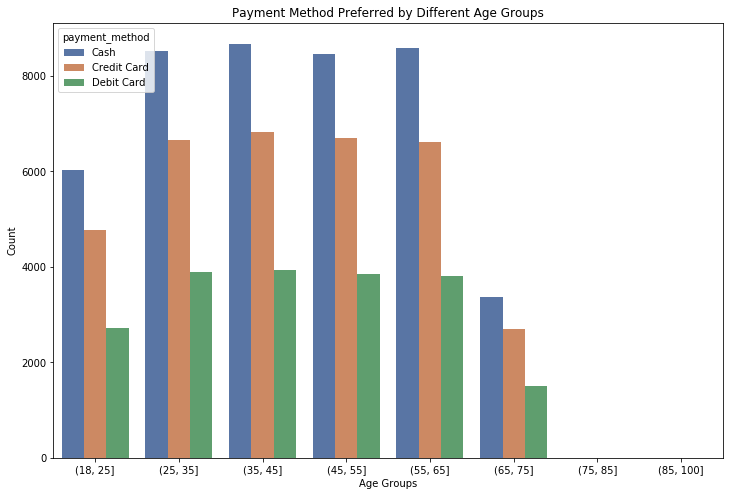

In [16]:
# Are there specific payment methods preferred by different age groups?
df_ageXpayment = df.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')
df_ageXpayment

plt.figure(figsize = (12,8))
sns.barplot(x= 'age_group', y = 'count', hue = 'payment_method', data = df_ageXpayment,  palette = 'deep')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Payment Method Preferred by Different Age Groups')
plt.show()

# 4. Seasonal Trends:

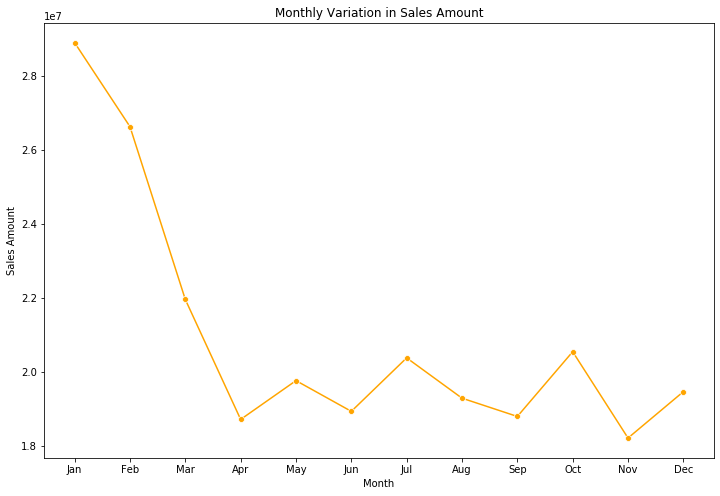

In [17]:
#Analyzing the monthly variation in sales volume.(of all year)

df['sales_amount'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y') #convert invoice date to date time format

df['month'] = df['invoice_date'].dt.month

monthly_sales_amount = df.groupby('month')['sales_amount'].sum()

plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Monthly Variation in Sales Amount')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

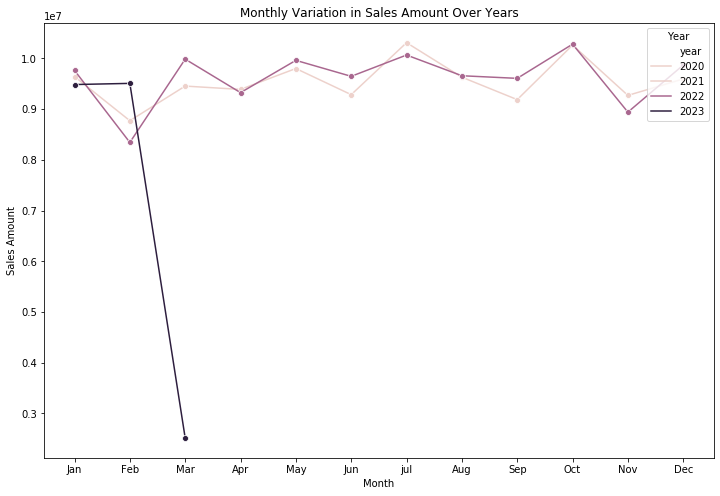

In [18]:
#Analyzing the monthly variation in sales volume.(of each year)
df['year'] = df['invoice_date'].dt.year
monthly_sales_amount = df.groupby(['year','month'], as_index = False).agg({'sales_amount':'sum'})

plt.figure(figsize=(12,8))
sns.lineplot(x = 'month', y = 'sales_amount', hue = 'year', data = monthly_sales_amount, marker='o')
plt.title('Monthly Variation in Sales Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title = 'Year', loc='upper right')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

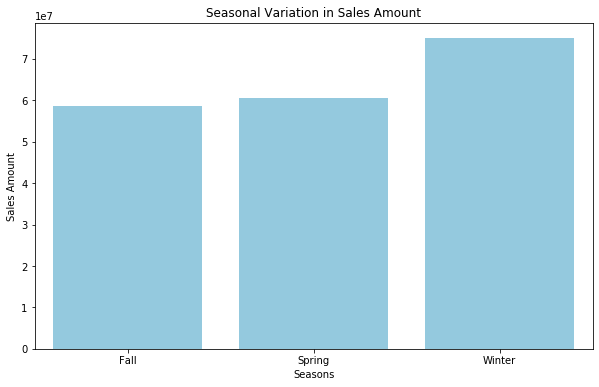

In [19]:
#Identify any significant seasonal trends or patterns in customer shopping behavior.

def map_to_season(month):
  if month in [12, 1 , 2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Fall'

df['seasons'] = df['month'].apply(map_to_season)

seasonal_sales = df.groupby('seasons')['sales_amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, color= 'skyblue')
plt.title('Seasonal Variation in Sales Amount')
plt.xlabel('Seasons')
plt.ylabel('Sales Amount')
plt.show()


# Conclusion from Initial Analysis

# RFM Analysis

In [20]:
df["Total_price"] = df["quantity"]*df["price"]

In [21]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')


In [22]:
today_date = df["invoice_date"].max() + pd.Timedelta(days=2)

In [23]:
rfm = df.groupby('customer_id').agg({"invoice_date": lambda invoice_date : (today_date - invoice_date.max()).days,
                                    "invoice_no": lambda invoice_no : invoice_no.nunique(),
                                    "Total_price": lambda Total_price : Total_price.sum(),
                                    "category": lambda category: ", ".join(category.unique()),
                                    "age": "max"})

In [24]:
rfm

,invoice_date,invoice_no,Total_price,category,age
customer_id,,,,,
C100004,469,1,7502.00,Clothing,61
C100005,7,1,2400.68,Shoes,34
C100006,99,1,322.56,Toys,44
C100012,572,1,130.75,Food & Beverage,25
C100019,593,1,35.84,Toys,21
...,...,...,...,...,...
C999886,2,1,47.07,Food & Beverage,61
C999910,125,1,136.35,Books,41
C999974,304,1,7502.00,Clothing,29


In [25]:
rfm.columns = ["Recency", "Frequency", "Monetary", "Category", "Age"]

In [26]:
rfm["Recency_Score"]=pd.qcut(rfm['Recency'], 3, labels = [3,2,1])

In [27]:
rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 3, labels = [1,2,3])

In [28]:
rfm["RFM_SCORE"] = (rfm['Recency_Score'].astype(str)+rfm['Monetary_Score'].astype(str))

In [29]:
rfm.describe()

,Recency,Frequency,Monetary,Age
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,398.884030,1.000171,2529.516074,43.427089
std,229.871351,0.018215,4225.283451,14.990054
min,2.000000,1.000000,5.230000,18.000000
25%,200.000000,1.000000,136.350000,30.000000
50%,398.000000,1.000000,600.170000,43.000000
75%,599.000000,1.000000,2700.720000,56.000000
max,798.000000,3.000000,45012.750000,69.000000


In [30]:
rfm.head()

,Recency,Frequency,Monetary,Category,Age,Recency_Score,Monetary_Score,RFM_SCORE
customer_id,,,,,,,,
C100004,469,1,7502.00,Clothing,61,2,3,23
C100005,7,1,2400.68,Shoes,34,3,3,33
C100006,99,1,322.56,Toys,44,3,2,32
C100012,572,1,130.75,Food & Beverage,25,1,1,11
C100019,593,1,35.84,Toys,21,1,1,11


In [ ]:
We want to have these five customers segment:

New customers, for those who just purchased recently, regardless the purchase frequency and total spending;
Lost customers, for those who haven’t purchased for a long time ;
Regular customers, business as usual, very good to have them;
Loyal customers, precisely our target market, surely the customers who love our products;
Champion customers, best of the best, certainly we want to keep them forever.

# Customer Segmentation

In [33]:
seg_map = {
    r'11': 'Lost_Customers',
    r'12': 'Lost_Customers',
    r'13': 'Lost_Customers',   
    r'21': 'Regular_Customers', 
    r'22': 'Loyal_Customers',
    r'23': 'Loyal_Customers',
    r'31': 'New_Customers',
    r'32': 'Champions',    
    r'33': 'Champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [36]:
#rfm.to_csv(r'c:/Users/subhi/Downloads/RFM_Metrics.csv', header=True) 

In [37]:
rfm

,Recency,Frequency,Monetary,Category,Age,Recency_Score,Monetary_Score,RFM_SCORE,segment
customer_id,,,,,,,,,
C100004,469,1,7502.00,Clothing,61,2,3,23,Loyal_Customers
C100005,7,1,2400.68,Shoes,34,3,3,33,Champions
C100006,99,1,322.56,Toys,44,3,2,32,Champions
C100012,572,1,130.75,Food & Beverage,25,1,1,11,Lost_Customers
C100019,593,1,35.84,Toys,21,1,1,11,Lost_Customers
...,...,...,...,...,...,...,...,...,...
C999886,2,1,47.07,Food & Beverage,61,3,1,31,New_Customers
C999910,125,1,136.35,Books,41,3,1,31,New_Customers
C999974,304,1,7502.00,Clothing,29,2,3,23,Loyal_Customers
